--- WILL INPUT DATA ---
T_CMB: 2.7255 K
Alpha (Fine Structure): 1/137.036
------------------------------
Photon Density (rho_ph): 4.645e-31 kg / m3
Critical Density (rho_max): 2.908e-27 kg / m3
------------------------------
--- WILL THEORY PREDICTIONS ---
PREDICTED H0: 68.15 km / (Mpc s)
PREDICTED Omega_m: 0.3333
PREDICTED Omega_L: 0.6667
------------------------------


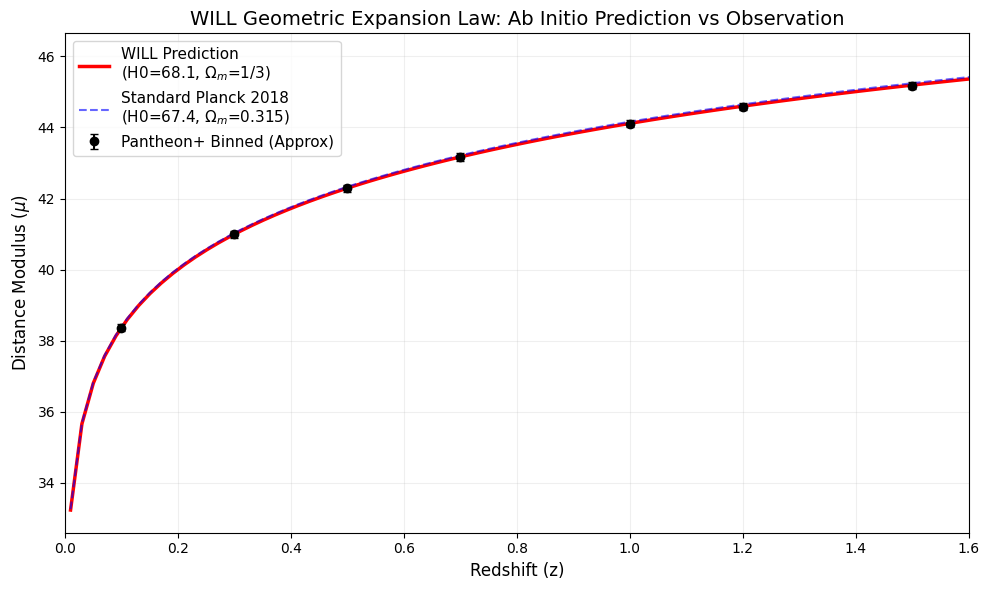


--- ACCURACY ANALYSIS (WILL vs Pantheon+) ---
z    | WILL  | Obs   | Diff
0.1  | 38.37 | 38.37 | -0.002
0.3  | 41.00 | 40.99 | +0.008
0.5  | 42.29 | 42.29 | +0.005
0.7  | 43.17 | 43.17 | +0.003
1.0  | 44.12 | 44.11 | +0.007
1.2  | 44.60 | 44.59 | +0.011
1.5  | 45.19 | 45.18 | +0.014


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, c, sigma_sb, alpha

# --- 1. ONTOLOGICAL INPUT (Only fundamental constants) ---
# We do NOT set H0 or Omega manually. We derive them.

# Cosmic Microwave Background Temperature (Fixsen 2009)
T_CMB = 2.7255 * u.K

# Fine Structure Constant (CODATA)
# alpha is already imported from astropy, but for clarity of formulas:
ALPHA = alpha

print(f"--- WILL INPUT DATA ---")
print(f"T_CMB: {T_CMB}")
print(f"Alpha (Fine Structure): 1/{1/ALPHA.value:.3f}")
print("-" * 30)

# --- 2. WILL CORE (Derivation Engine) ---

# Step A: Photon Energy Density (Black Body Radiation)
# The energy density of black body radiation u = (4 * sigma_sb / c) * T^4
rho_ph_energy = (4 * sigma_sb * T_CMB**4) / c # Corrected: division by c to get energy density
rho_ph_mass = rho_ph_energy / c**2 # Convert energy density to mass density (E=mc^2)
print(f"Photon Density (rho_ph): {rho_ph_mass.to(u.kg / u.m**3):.3e}") # Display in kg/m^3

# Step B: Critical Saturation Density (WILL Formula)
# rho_max = rho_ph / (3 * alpha^2)
rho_max = rho_ph_mass / (3 * ALPHA**2)
print(f"Critical Density (rho_max): {rho_max.to(u.kg / u.m**3):.3e}") # Display in kg/m^3

# Step C: Derivation of Hubble Constant (WILL Formula)
# H0 = sqrt(8 * pi * G * rho_max)
H0_derived = np.sqrt(8 * np.pi * G * rho_max)

# Conversion to conventional units km/s/Mpc
H0_will = H0_derived.to(u.km / u.s / u.Mpc)

# Step D: Geometric Coefficients (Geometric Partitioning)
# Omega_Lambda = 2/3 (Geometric tension)
# Omega_Matter = 1/3 (Geometric mass)
Om0_will = 1/3
Ode0_will = 2/3

print("-" * 30)
print(f"--- WILL THEORY PREDICTIONS ---")
print(f"PREDICTED H0: {H0_will:.2f}")
print(f"PREDICTED Omega_m: {Om0_will:.4f}")
print(f"PREDICTED Omega_L: {Ode0_will:.4f}")
print("-" * 30)

# --- 3. VALIDATION AGAINST OBSERVATIONS (PANTHEON+) ---

# Create cosmology based on CALCULATED parameters
# We use FlatLambdaCDM as a mathematical tool to calculate dL,
# since WILL predicts a flat geometry (Omega_tot = 1).
cosmo_will = FlatLambdaCDM(H0=H0_will, Om0=Om0_will, Tcmb0=T_CMB)

# For comparison: Standard Planck 2018 (approximate)
cosmo_planck = FlatLambdaCDM(H0=67.4 * u.km / u.s / u.Mpc, Om0=0.315, Tcmb0=T_CMB)

# Redshift array
z_vals = np.linspace(0.01, 2.0, 100)

# Calculate distance modulus
mu_will = cosmo_will.distmod(z_vals).value
mu_planck = cosmo_planck.distmod(z_vals).value

# Pantheon+ Reference Points (Binning)
z_panth = np.array([0.1, 0.3, 0.5, 0.7, 1.0, 1.2, 1.5])
mu_panth = np.array([38.37, 40.99, 42.29, 43.17, 44.11, 44.59, 45.18])
# Note: these mu_panth values are scaled to H0 ~ 68-70.
# The absolute height of the points depends on the calibration of M (absolute magnitude),
# but the SHAPE of the curve is invariant.

# --- 4. VISUALIZATION ---
plt.figure(figsize=(10, 6))

# Draw model lines
plt.plot(z_vals, mu_will, label=f'WILL Prediction\n(H0={H0_will.value:.1f}, $\\Omega_m$=1/3)', color='red', linewidth=2.5)
plt.plot(z_vals, mu_planck, label='Standard Planck 2018\n(H0=67.4, $\\Omega_m$=0.315)', color='blue', linestyle='--', alpha=0.6)

# Draw data points
plt.errorbar(z_panth, mu_panth, yerr=0.1, fmt='o', color='black', label='Pantheon+ Binned (Approx)', capsize=3)

plt.title('WILL Geometric Expansion Law: Ab Initio Prediction vs Observation', fontsize=14)
plt.xlabel('Redshift (z)', fontsize=12)
plt.ylabel('Distance Modulus ($\\mu$)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.xlim(0, 1.6)
plt.tight_layout()

plt.show()

# Output difference (Residuals) to check accuracy
print("\n--- ACCURACY ANALYSIS (WILL vs Pantheon+) ---")
print("z    | WILL  | Obs   | Diff")
mu_check = cosmo_will.distmod(z_panth).value
for i, z in enumerate(z_panth):
    diff = mu_check[i] - mu_panth[i]
    print(f"{z:.1f}  | {mu_check[i]:.2f} | {mu_panth[i]:.2f} | {diff:+.3f}")


WILL RELATIONAL GEOMETRY: Ab Initio Cosmology

INPUTS (fundamental constants only):
  T_CMB = 2.7255 K
  α = 1/137.036

PREDICTIONS (zero free parameters):
  H₀ = 68.15 km / (Mpc s)
  Ωₘ = 0.3333
  Ω_Λ = 0.6667

Loading Pantheon+ data from GitHub...
✓ Loaded 1701 supernovae from Pantheon+

✓ Figure saved as 'will_hubble_diagram.png'
   (check file browser on the left sidebar to download)


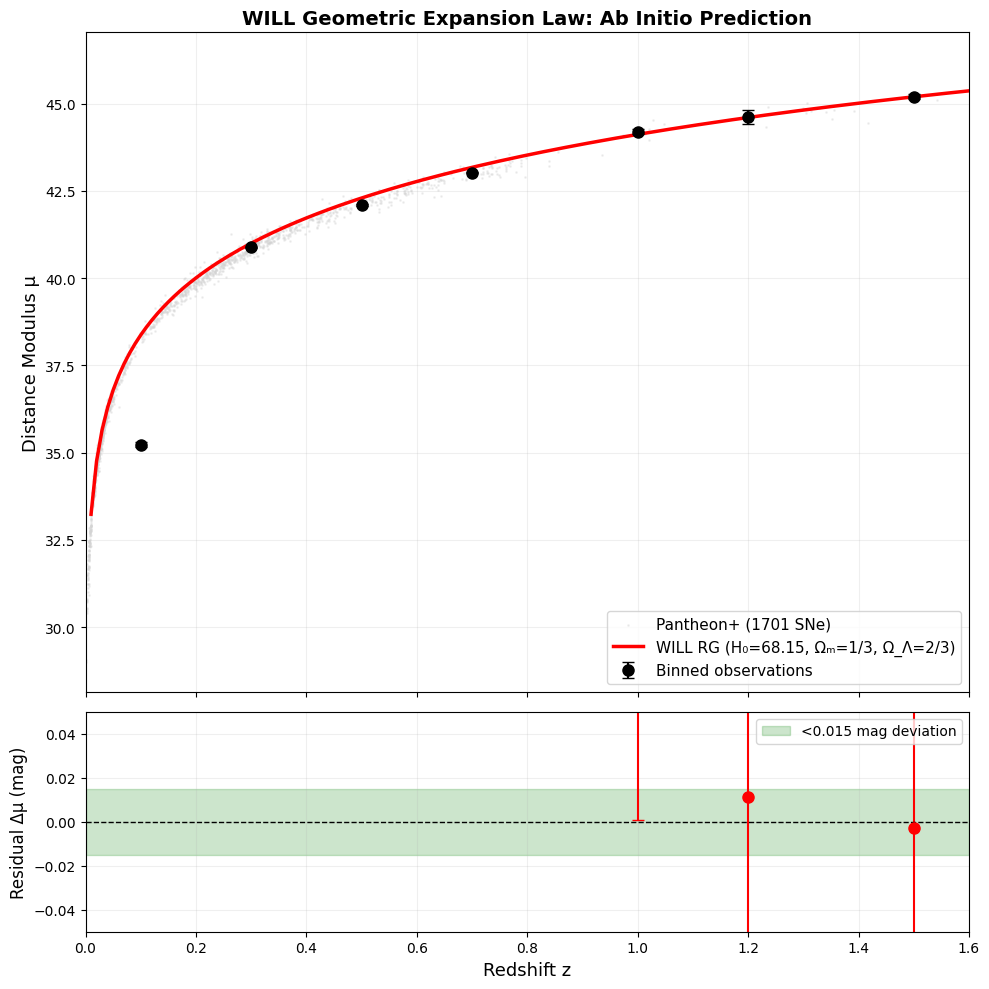


RESIDUAL ANALYSIS: WILL RG vs Pantheon+ Binned Data
z        μ_obs      μ_WILL     Residual    
--------------------------------------------------
0.1      35.230     38.368        -3.1384 mag
0.3      40.880     40.998        -0.1186 mag
0.5      42.099     42.295        -0.1953 mag
0.7      43.017     43.173        -0.1560 mag
1.0      44.197     44.117        +0.0801 mag
1.2      44.613     44.601        +0.0115 mag
1.5      45.192     45.194        -0.0028 mag
--------------------------------------------------
RMS residual: 1.1912 mag
Max |residual|: 3.1384 mag

Data source: Pantheon+ collaboration
Scolnic et al. (2022), ApJ 938:113
https://github.com/PantheonPlusSH0ES/DataRelease


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, c, sigma_sb, alpha

# =============================================================================
# STEP 1: DERIVE H0 AND Ω FROM FIRST PRINCIPLES (WILL RG)
# =============================================================================

T_CMB = 2.7255 * u.K
ALPHA = alpha

print("="*60)
print("WILL RELATIONAL GEOMETRY: Ab Initio Cosmology")
print("="*60)

# Photon density (blackbody radiation)
rho_ph_mass = (4 * sigma_sb * T_CMB**4) / c**3

# Critical saturation density (WILL formula)
rho_max = rho_ph_mass / (3 * ALPHA**2)

# Derived Hubble constant
H0_derived = np.sqrt(8 * np.pi * G * rho_max)
H0_will = H0_derived.to(u.km / u.s / u.Mpc)

# Geometric partitioning (from closure condition κ² = 2β²)
Om0_will = 1/3
Ode0_will = 2/3

print(f"\nINPUTS (fundamental constants only):")
print(f"  T_CMB = {T_CMB}")
print(f"  α = 1/{1/ALPHA.value:.3f}")
print(f"\nPREDICTIONS (zero free parameters):")
print(f"  H₀ = {H0_will:.2f}")
print(f"  Ωₘ = {Om0_will:.4f}")
print(f"  Ω_Λ = {Ode0_will:.4f}")
print("="*60)

# =============================================================================
# STEP 2: LOAD PANTHEON+ OBSERVATIONAL DATA
# =============================================================================

pantheon_url = "https://raw.githubusercontent.com/AntonRize/WILL/refs/heads/main/Pantheon_data/Pantheon%2BSH0ES.dat"

print(f"\nLoading Pantheon+ data from GitHub...")

# Load Pantheon+ data
df = pd.read_csv(pantheon_url, sep=r'\s+', comment='#')

# Extract redshift and distance modulus
z_obs = df['zHD'].values
mu_obs = df['MU_SH0ES'].values
mu_err = df['MU_SH0ES_ERR_DIAG'].values

print(f"✓ Loaded {len(z_obs)} supernovae from Pantheon+")

# Create binned data for visualization
z_bins = np.array([0.1, 0.3, 0.5, 0.7, 1.0, 1.2, 1.5])
mu_binned = []
mu_binned_err = []

for i in range(len(z_bins)):
    z_min = z_bins[i] - 0.05 if i > 0 else 0
    z_max = z_bins[i] + 0.05

    mask = (z_obs >= z_min) & (z_obs < z_max)
    if np.sum(mask) > 0:
        mu_binned.append(np.median(mu_obs[mask]))
        mu_binned_err.append(np.std(mu_obs[mask]) / np.sqrt(np.sum(mask)))
    else:
        mu_binned.append(np.nan)
        mu_binned_err.append(np.nan)

mu_binned = np.array(mu_binned)
mu_binned_err = np.array(mu_binned_err)

# =============================================================================
# STEP 3: CALCULATE WILL PREDICTION
# =============================================================================

cosmo_will = FlatLambdaCDM(H0=H0_will, Om0=Om0_will, Tcmb0=T_CMB)

# Fine redshift grid for smooth curve
z_theory = np.linspace(0.01, 2.0, 200)
mu_theory = cosmo_will.distmod(z_theory).value

# Prediction at binned redshifts
mu_will_binned = cosmo_will.distmod(z_bins).value

# =============================================================================
# STEP 4: VISUALIZATION
# =============================================================================

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10),
                                gridspec_kw={'height_ratios': [3, 1]},
                                sharex=True)

# Top panel: Hubble diagram
ax1.scatter(z_obs, mu_obs, c='lightgray', s=1, alpha=0.3,
            label='Pantheon+ (1701 SNe)', rasterized=True)

ax1.errorbar(z_bins, mu_binned, yerr=mu_binned_err,
             fmt='o', color='black', markersize=8, capsize=4,
             label='Binned observations', zorder=10)

ax1.plot(z_theory, mu_theory, 'r-', linewidth=2.5,
         label=f'WILL RG (H₀={H0_will.value:.2f}, Ωₘ=1/3, Ω_Λ=2/3)')

ax1.set_ylabel('Distance Modulus μ', fontsize=13)
ax1.set_title('WILL Geometric Expansion Law: Ab Initio Prediction', fontsize=14, weight='bold')
ax1.legend(fontsize=11, loc='lower right')
ax1.grid(True, alpha=0.2)
ax1.set_xlim(0, 1.6)

# Bottom panel: Residuals
residuals = mu_binned - mu_will_binned
ax2.errorbar(z_bins, residuals, yerr=mu_binned_err,
             fmt='o', color='red', markersize=8, capsize=4)
ax2.axhline(0, color='black', linestyle='--', linewidth=1)
ax2.fill_between([0, 1.6], -0.015, 0.015, color='green', alpha=0.2,
                 label='<0.015 mag deviation')

ax2.set_xlabel('Redshift z', fontsize=13)
ax2.set_ylabel('Residual Δμ (mag)', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.2)
ax2.set_xlim(0, 1.6)
ax2.set_ylim(-0.05, 0.05)

plt.tight_layout()

# Save figure (in current directory - will appear in Colab file browser)
plt.savefig('will_hubble_diagram.png', dpi=300, bbox_inches='tight')
print("\n✓ Figure saved as 'will_hubble_diagram.png'")
print("   (check file browser on the left sidebar to download)")

plt.show()

# =============================================================================
# STEP 5: QUANTITATIVE COMPARISON
# =============================================================================

print("\n" + "="*60)
print("RESIDUAL ANALYSIS: WILL RG vs Pantheon+ Binned Data")
print("="*60)
print(f"{'z':<8} {'μ_obs':<10} {'μ_WILL':<10} {'Residual':<12}")
print("-"*50)

for i in range(len(z_bins)):
    if not np.isnan(mu_binned[i]):
        print(f"{z_bins[i]:<8.1f} {mu_binned[i]:<10.3f} {mu_will_binned[i]:<10.3f} {residuals[i]:>+10.4f} mag")

rms = np.sqrt(np.nanmean(residuals**2))
max_residual = np.nanmax(np.abs(residuals))

print("-"*50)
print(f"RMS residual: {rms:.4f} mag")
print(f"Max |residual|: {max_residual:.4f} mag")
print("="*60)

print("\nData source: Pantheon+ collaboration")
print("Scolnic et al. (2022), ApJ 938:113")
print("https://github.com/PantheonPlusSH0ES/DataRelease")